In [5]:
import json
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd
import matplotlib.path as mplPath
import matplotlib.patches as patches
from Analyzor import Func
from Analyzor.EnergyAndRangeConvertor import PowerTable
from Analyzor.KINEMATICS.KINEMATICS import KINEMATICS
from Analyzor.KINEMATICS.tbjcconstants import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

## read the data and convert the it into a dataframe

In [2]:
with open('data.dat') as f:
    l = json.load(f)
    data = []
    for one in l:
        xc,yc = one['data'][-1]
        points = one['data'][:-1]
        d = [Func.GetLineInfo((x_,y_),(xc,yc)) for x_,y_ in points]
        data.append({'runID': one['runID'], 'fileID': one['fileID'], 'eventID': one['eventID'],
               'theta1':d[0][0],'L1':d[0][1],
               'theta2':d[1][0],'L2':d[1][1],'Range':d[2][1]})
    
df = pd.DataFrame(data)

## plot theta1 vs theta2 and create gates for 10C(a,a) and 4He(a,a) particle groups

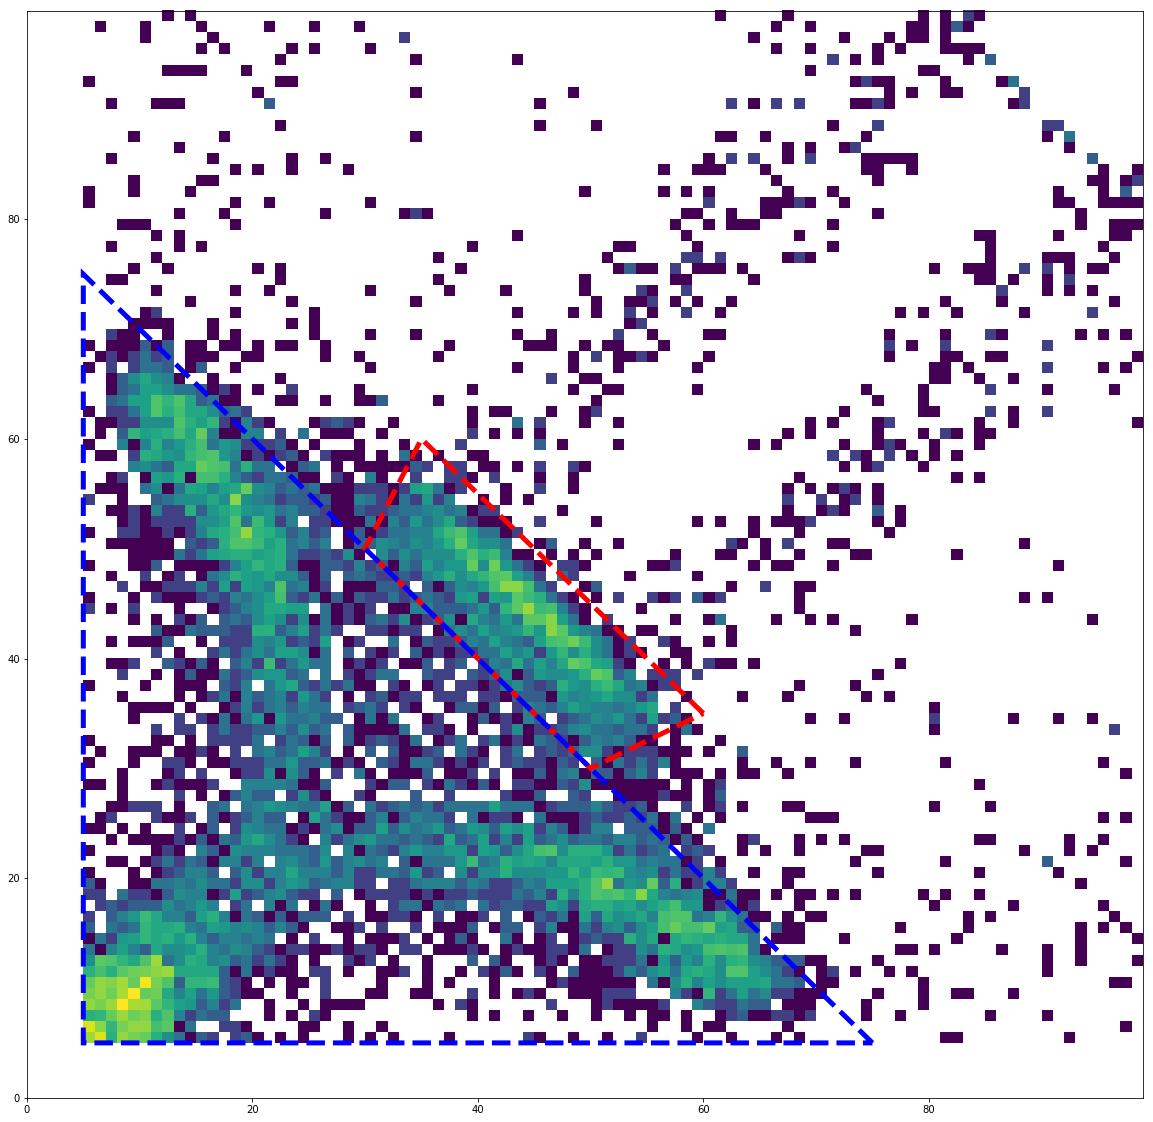

In [3]:

mask = ((df['Range']>2) & df['L1'].between(4,10000) & df['L2'].between(4,10000) 
& df['theta1'].between(5,160) & df['theta2'].between(5,160))
    
df_tmp = df[mask]

x,y = np.sort(df_tmp[['theta1','theta2']],axis=1).T
#print np.concatenate([x,y])
plt.hist2d(np.concatenate([x,y]),np.concatenate([y,x]),
           bins=[np.arange(0,100,1),np.arange(0,100,1)],
           norm=LogNorm());


poly = [[60,35],[35,60],[30,50],[50,30],[60,35]]
path2 = mplPath.Path(poly)
patch2 = patches.PathPatch(path2, facecolor=(0,0,0,0),EdgeColor='r', lw=5,linestyle='--')
plt.gca().add_patch(patch2)


poly = [[75,5],[5,75],[5,5],[75,5]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='b', lw=5,linestyle='--')
plt.gca().add_patch(patch1)


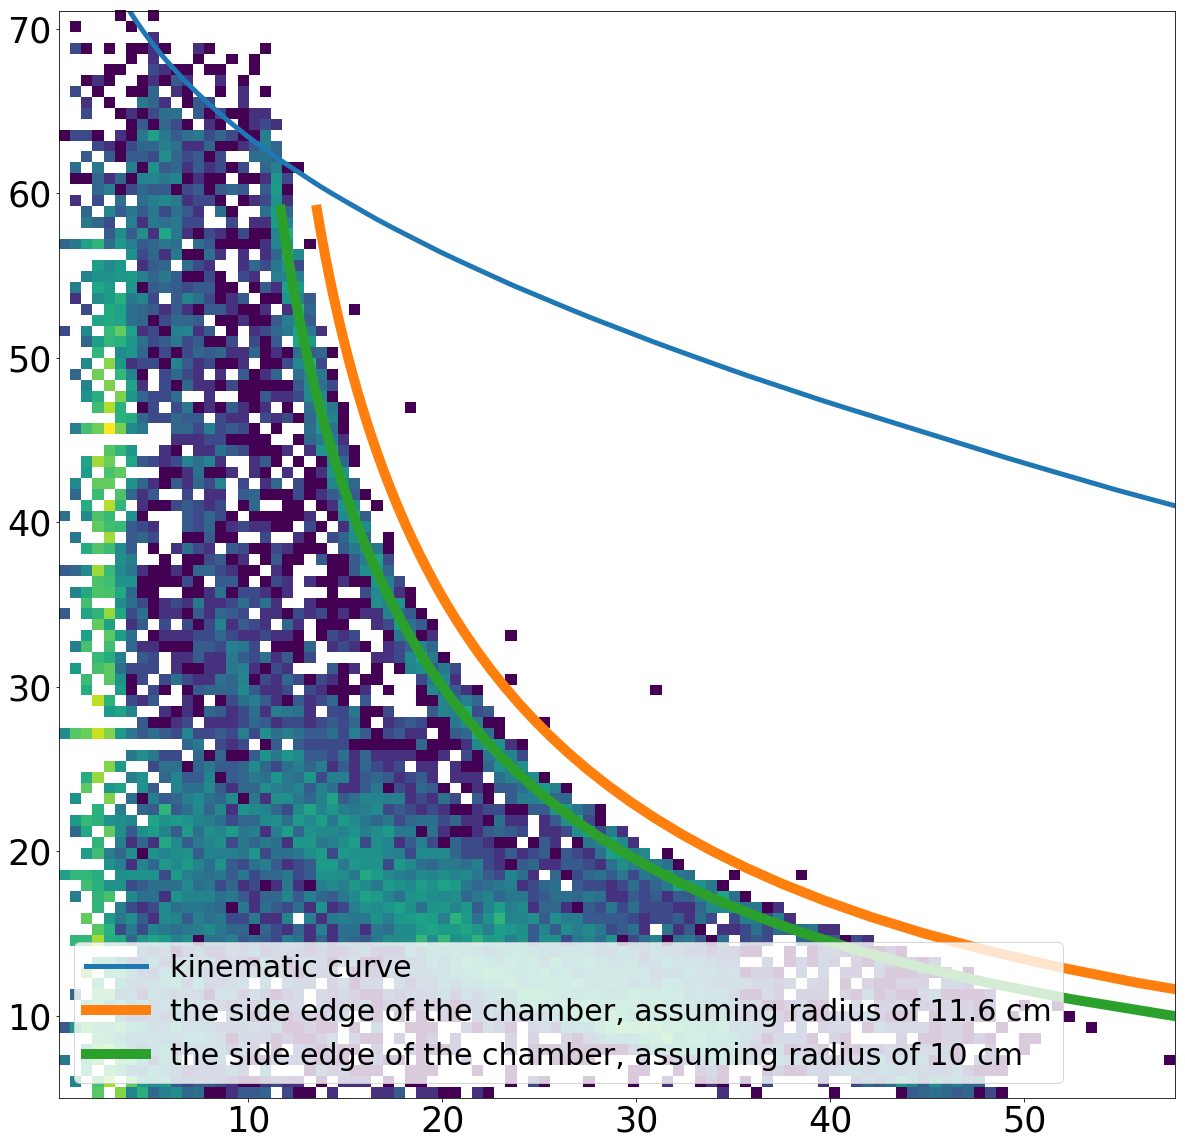

In [14]:
### plot the theta vs L, if one branch of the vertex fall into the polygon plotted above

mask = path1.contains_points(df[['theta1','theta2']].values) & (df['L1']<37) 

x_ = np.concatenate([df[mask]['L1'],df[mask]['L2']])
y_ = np.concatenate([df[mask]['theta1'],df[mask]['theta2']])

plt.hist2d(x_,y_,bins=100,norm=LogNorm());
plt.tick_params(axis='both', which='major', labelsize=35)


### plot the simulated curve for 10C(a,a) reaction with 10C energy of 40MeV at reaction point
    
angles,Ks = [],[]
pt = PowerTable("Tables/EnergyTable/He_HeCO2_400_Torr.txt")
KIN = KINEMATICS((10,4,4,10),40,0,0)

for i in range(180):
    KIN.calculate(i*constant_degree,0)
    angles.append(KIN.thetalab2)
    Ks.append(pt.E2R(KIN.K2)*0.3)

plt.plot(Ks,angles, linewidth=5, label="kinematic curve")


### plot the range of the alpha particles with hitting the wall of the chamber, assuming two sizes of 10cm and 11.6cm

angles,Ks = [],[]

for i in range(5,60):
    angles.append(i)
    Ks.append(11.6/math.sin(math.radians(i)))

plt.plot(Ks,angles,linewidth=10,label="the side edge of the chamber, assuming radius of 11.6 cm")

angles,Ks = [],[]

for i in range(5,60):
    angles.append(i)
    Ks.append(10/math.sin(math.radians(i)))

plt.plot(Ks,angles,linewidth=10,label="the side edge of the chamber, assuming radius of 10 cm")

plt.legend(fontsize=30)